In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Load the dataset
df = pd.read_csv('Nairobi_Kenya.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          102
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              366 non-null    object        
 1   datetime          366 non-null    datetime64[ns]
 2   tempmax           366 non-null    float64       
 3   tempmin           366 non-null    float64       
 4   temp              366 non-null    float64       
 5   feelslikemax      366 non-null    float64       
 6   feelslikemin      366 non-null    float64       
 7   feelslike         366 non-null    float64       
 8   dew               366 non-null    float64       
 9   humidity          366 non-null    float64       
 10  precip            366 non-null    float64       
 11  precipprob        366 non-null    int64         
 12  precipcover       366 non-null    float64       
 13  preciptype        264 non-null    object        
 14  snow              366 non-

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2024-11-12 12:00:00.000000256,77.690437,59.776230,67.783333,77.292623,59.776230,67.722131,54.858470,66.387705,0.033175,...,14.093716,100.938251,1022.46612,71.806284,7.721858,230.771585,19.924590,8.035519,10.218579,0.481175
min,2024-05-14 00:00:00,64.400000,49.700000,60.500000,64.400000,49.700000,60.500000,38.800000,32.800000,0.000000,...,2.100000,11.200000,1016.40000,10.300000,6.200000,50.600000,4.300000,2.000000,10.000000,0.000000
25%,2024-08-13 06:00:00,75.200000,58.300000,66.100000,75.200000,58.300000,66.025000,52.500000,60.200000,0.000000,...,11.400000,69.800000,1021.40000,66.500000,7.400000,197.950000,17.100000,7.000000,10.000000,0.250000
50%,2024-11-12 12:00:00,77.900000,60.300000,68.000000,77.900000,60.300000,68.000000,55.100000,67.550000,0.000000,...,13.450000,83.000000,1022.50000,78.300000,7.600000,238.350000,20.600000,8.000000,10.000000,0.480000
75%,2025-02-11 18:00:00,80.575000,62.100000,69.500000,79.975000,62.100000,69.500000,57.900000,73.600000,0.007000,...,16.700000,124.100000,1023.70000,85.475000,7.800000,266.300000,23.000000,9.000000,10.000000,0.730000
max,2025-05-14 00:00:00,89.000000,65.800000,74.200000,87.900000,65.800000,73.800000,60.600000,86.400000,0.945000,...,29.100000,352.400000,1027.20000,92.000000,12.100000,340.600000,29.500000,10.000000,30.000000,0.980000
std,NaN,3.960959,2.894616,2.783320,3.461044,2.894616,2.698173,3.644274,9.619024,0.107977,...,4.237864,50.334486,1.74469,18.365836,0.742571,52.911772,4.575407,1.622224,2.082223,0.285954


In [6]:
drop_cols = ['name', 'preciptype', 'conditions', 'description', 'icon', 'stations', 'sunrise', 'sunset']
df.drop(columns=drop_cols, inplace=True)
df = df.dropna()
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
0,2024-05-14,77.2,61.0,68.9,77.2,61.0,68.9,58.3,70.8,0.000,...,13.6,137.6,1022.4,86.1,7.6,232.5,20.2,8,10,0.20
1,2024-05-15,78.0,62.6,69.4,78.0,62.6,69.4,59.1,71.3,0.000,...,10.2,169.2,1023.1,86.9,7.5,230.4,19.9,7,10,0.25
2,2024-05-16,79.6,61.0,68.4,79.6,61.0,68.4,59.5,75.1,0.709,...,14.5,186.2,1023.4,85.5,7.7,210.6,18.2,7,10,0.27
3,2024-05-17,78.8,60.1,68.7,78.8,60.1,68.7,60.4,76.7,0.004,...,9.8,113.6,1022.8,82.4,7.4,223.3,19.1,8,10,0.30
4,2024-05-18,79.1,62.4,69.9,79.1,62.4,69.9,60.6,74.2,0.000,...,10.8,129.2,1022.1,82.5,7.9,230.8,19.9,8,10,0.33


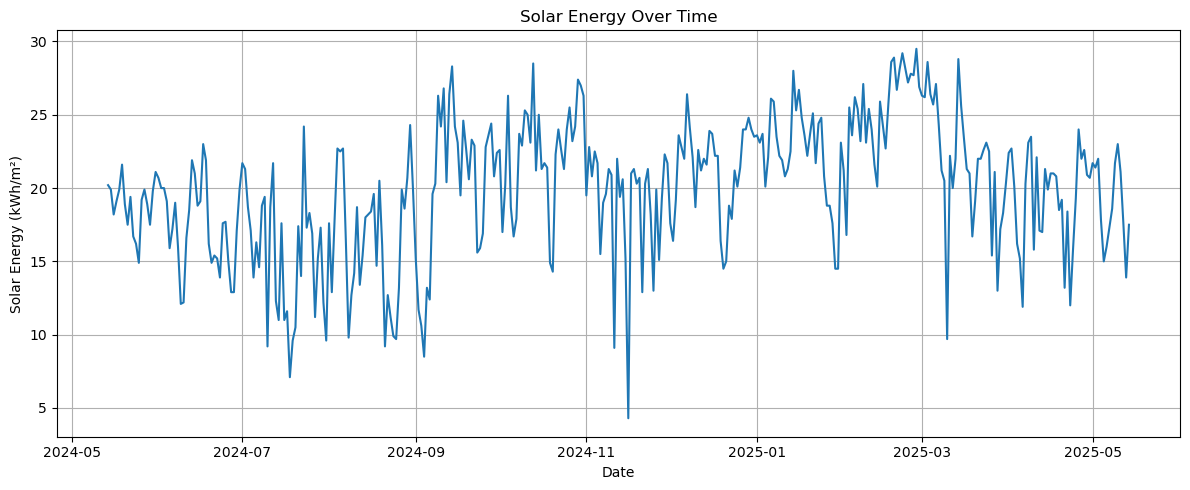

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(df['datetime'], df['solarenergy'])
plt.title('Solar Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Solar Energy (kWh/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()

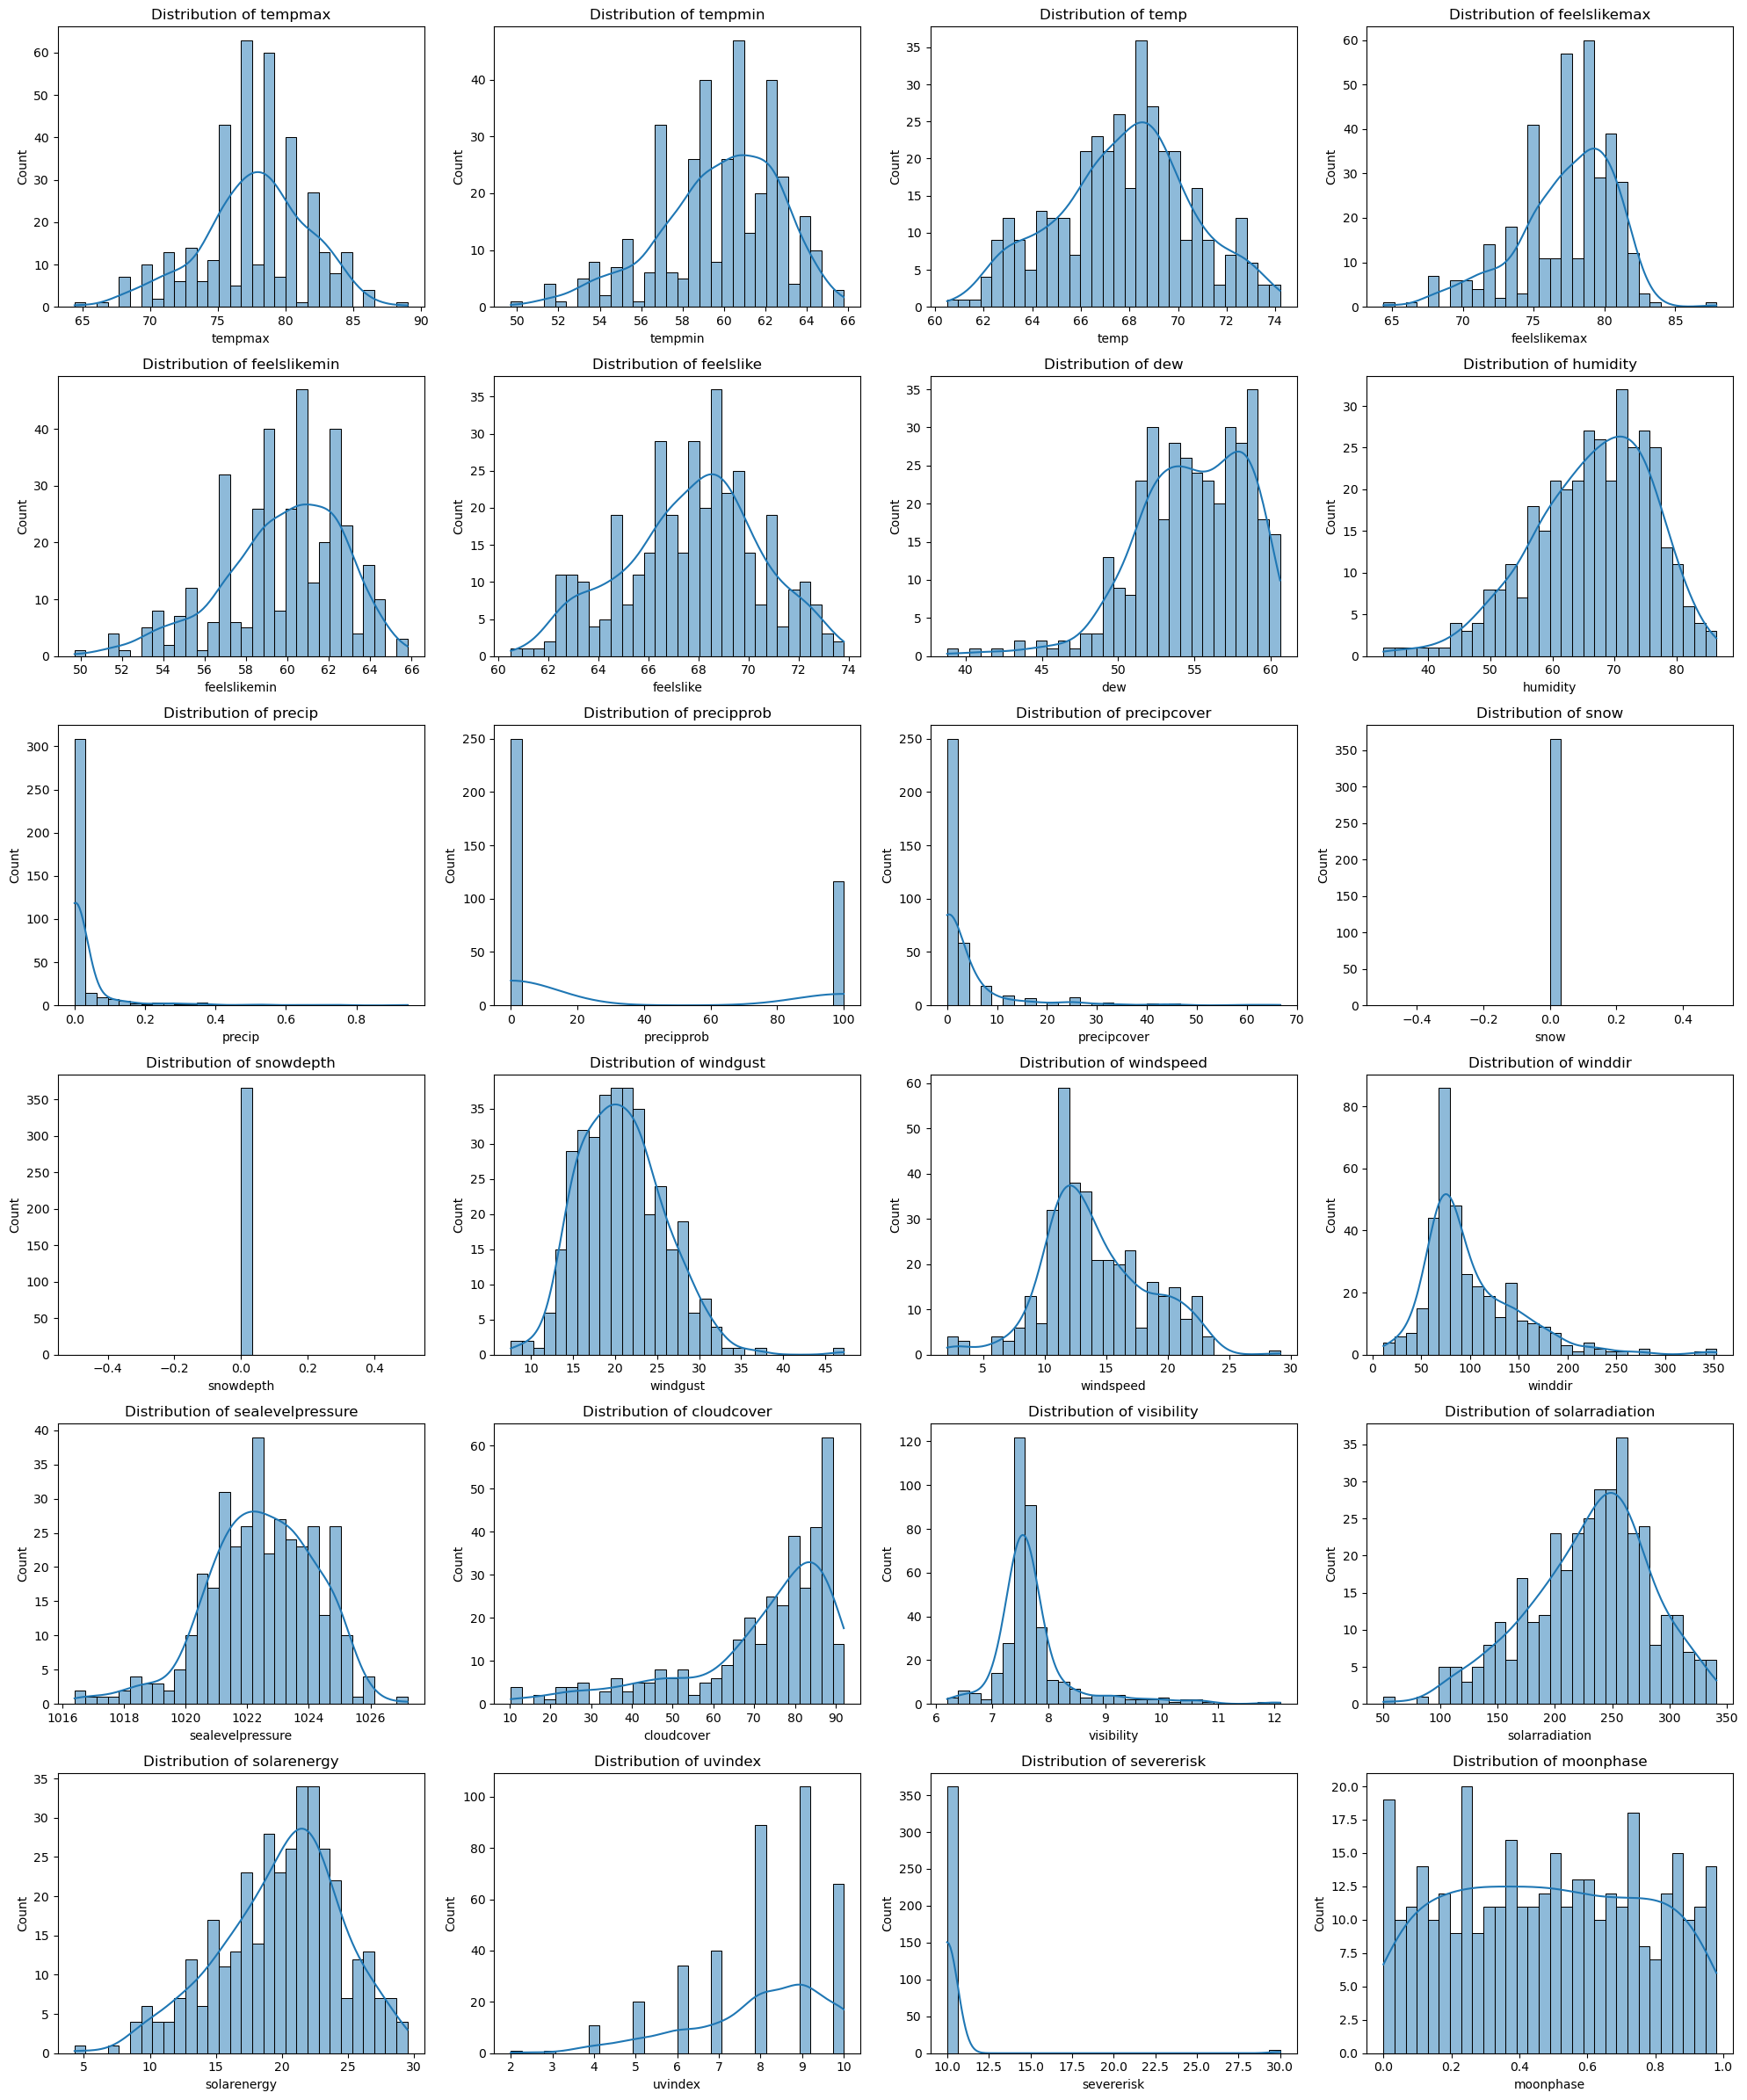

In [8]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
import math
cols = 4
rows = math.ceil(len(numeric_features) / cols)
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

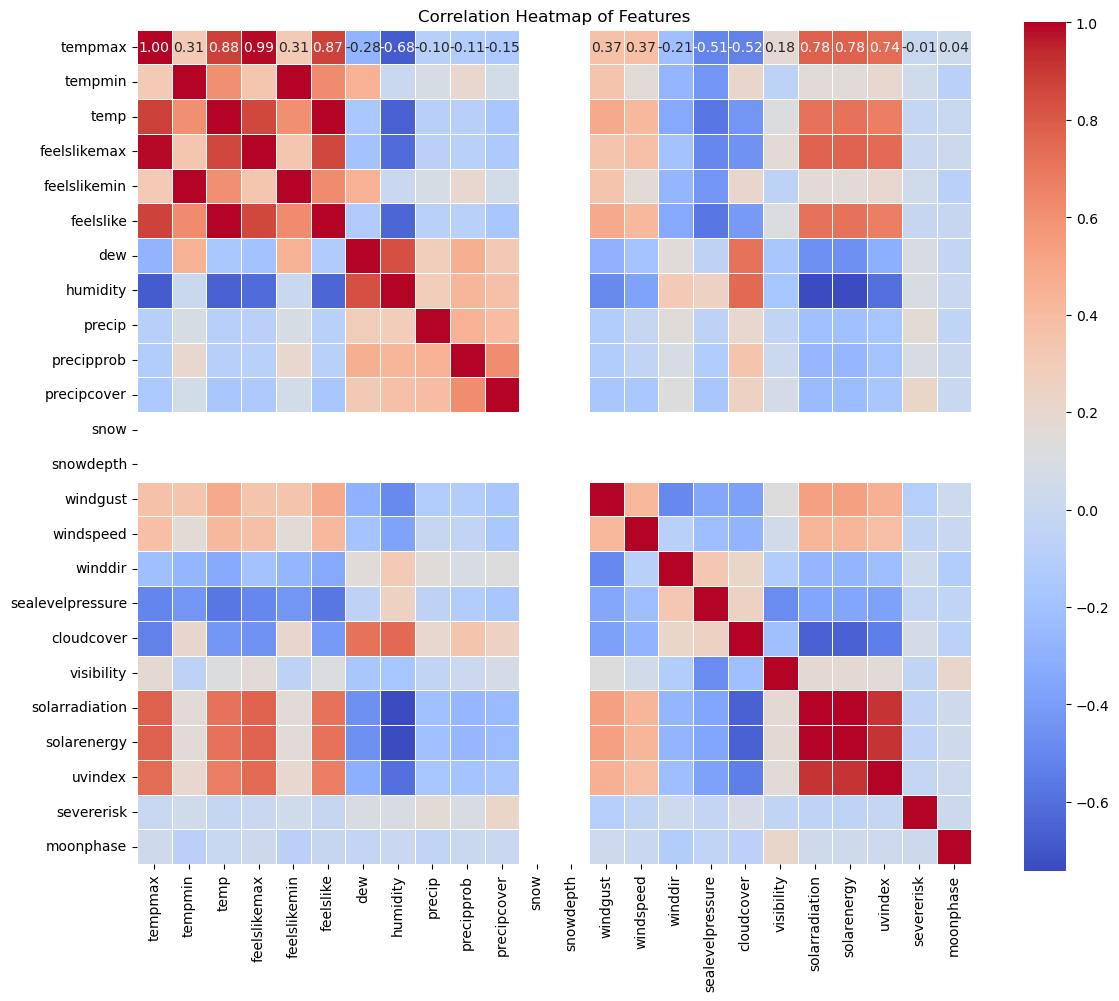

In [9]:
plt.figure(figsize=(12, 10))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

In [10]:
# Extract time-based features
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day_of_year'] = df['datetime'].dt.dayofyear

In [11]:
# Select our target and features
TARGET = 'solarenergy'

FEATURES = [
    'temp',
    'humidity',
    'cloudcover',
    'solarradiation',
    'uvindex',
    'hour',
    'month',
    'day_of_year'
]

# Create our feature matrix (X) and target vector (y)
X = df[FEATURES]
y = df[TARGET]

In [12]:
# Split data into training and testing sets in the ratio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In our case, that'll be 292 samples for training & 74 samples for testing
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (292, 8)
Test set shape: (74, 8)


In [14]:
# Initialize the XGBoost Regressor model
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train the model on the training data with early stopping
print("\nTraining the XGBoost model...")
xgboost_model.fit(X_train, y_train,
                  eval_set=[(X_test, y_test)],
                  verbose=False)
print("Model training complete.")


Training the XGBoost model...
Model training complete.


In [15]:
# Make predictions on the test data
y_pred = xgboost_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print output to 4 decimal places
print("\n--- Model Evaluation Results ---")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print("---------------------------------")


--- Model Evaluation Results ---
MAE: 0.2893
RMSE: 0.4716
R² Score: 0.9882
---------------------------------



Generating prediction visualizations...


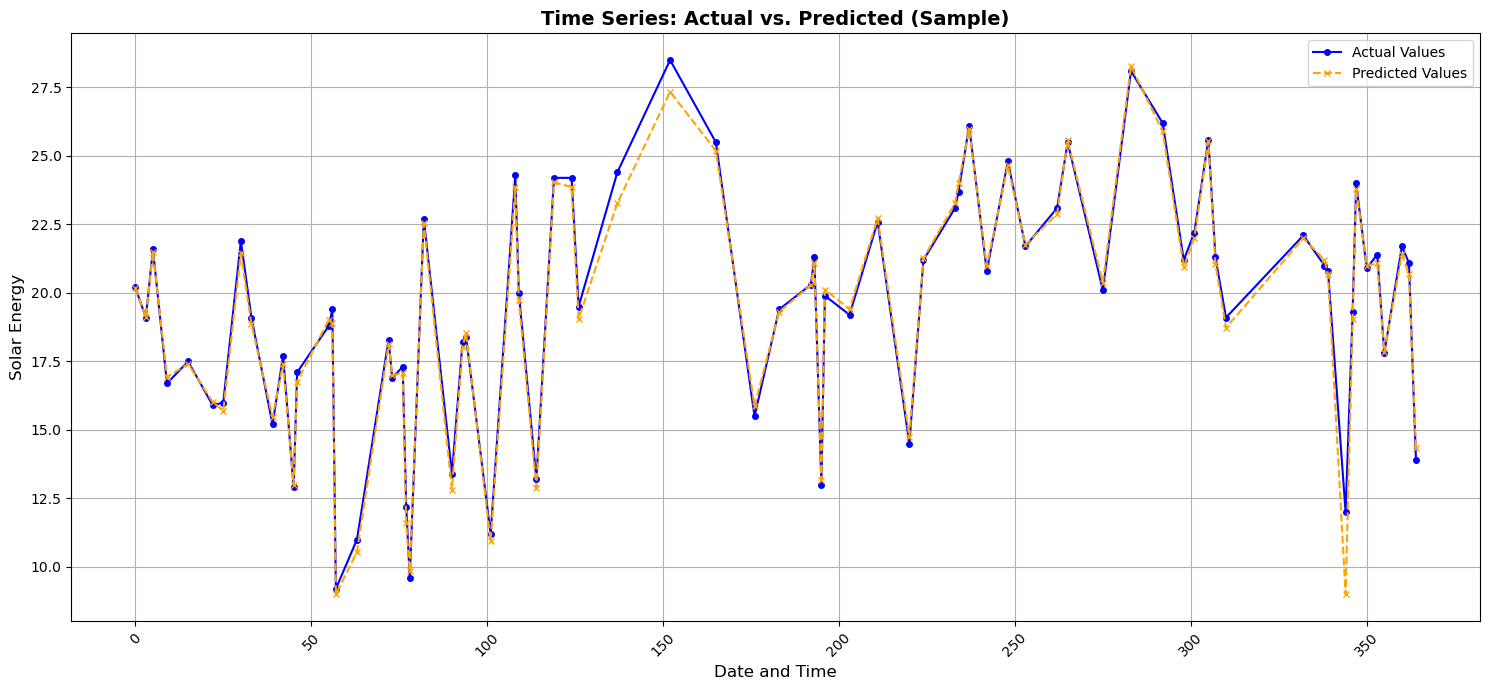

In [16]:
# Visualize the prediction
print("\nGenerating prediction visualizations...")

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df = results_df.sort_index()

# Plot a sample of the data to keep it readable (first 7 days)
sample_results = results_df.iloc[:24*7]

plt.figure(figsize=(15, 7))
plt.plot(sample_results.index, sample_results['Actual'], label='Actual Values', color='blue', marker='o', markersize=4, linestyle='-')
plt.plot(sample_results.index, sample_results['Predicted'], label='Predicted Values', color='orange', marker='x', markersize=4, linestyle='--')
plt.xlabel("Date and Time", fontsize=12)
plt.ylabel("Solar Energy", fontsize=12)
plt.title("Time Series: Actual vs. Predicted (Sample)", fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()